### Create features without filtering things out
---

* Model Design Feedback:
    * Make the target less restrictive
        * ACH return in 3 days
        * Consider Indeterminate...this is what essentially make model look better
    * Candidates: 
        * Account balance < 0
        * Closed by risk, write off, charged off
    * Use more recent data, when Plaid is available.
        * Check availability of Plaid features
    * Drop Giact features



In [1]:
import pandas as pd
import numpy as np
import category_encoders
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%load_ext autoreload
%autoreload 2

In [2]:
transactions_df = pd.read_parquet('../../artifacts/20201005/transactions_df_unlabeled_with_tmx.parquet')

<AxesSubplot:>

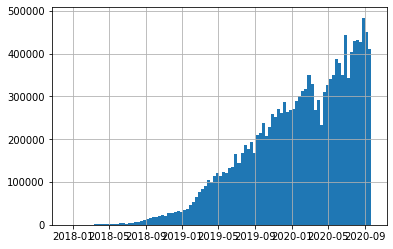

In [3]:
transactions_df.transaction_datetime.hist(bins=100)

In [4]:
transactions_df.shape, transactions_df.is_returned.value_counts()

((15295228, 199), False    644290
 True      42889
 Name: is_returned, dtype: int64)

### Drop non ACH
---

In [5]:
def drop_non_ach(df):
    df = df[df['transaction_code'].isin(['ACHDD']) & (df['transaction_amount'] > 0)]
    return df

In [6]:
transactions_df = drop_non_ach(transactions_df)

In [7]:
transactions_df.shape, transactions_df.is_returned.value_counts()

((664067, 199), False    644290
 True      19777
 Name: is_returned, dtype: int64)

### Train and OOT dev
---

In [8]:
modeling_df = transactions_df[transactions_df["transaction_datetime"].between(pd.to_datetime('2020-05-01'),
                                                    pd.to_datetime('2020-07-31'))]
test_df = transactions_df[transactions_df["transaction_datetime"] > pd.to_datetime('2020-08-01')]

In [9]:
modeling_df.shape,  test_df.shape

((112599, 199), (88890, 199))

In [11]:
modeling_df.is_returned.value_counts()

False    108825
True       3774
Name: is_returned, dtype: int64

In [12]:
test_df.is_returned.value_counts()

False    84689
True      4201
Name: is_returned, dtype: int64